# <center>${\textbf{Deep Learning}}$</center><br><center>${\textbf{ Artificial Neural Network :  ANN}}$</center><br><center>${\textbf{Fashion MNIST}}$</center>


${\textbf{Introduction }}$ In this practical, we construct and train a feed-forward neural network (sometimes known as a "MLP" for "multi-layer perceptron") using the "Fashion MNIST" dataset, which consists of tiny greyscale photographs of fashion products.

In [1]:
from __future__ import print_function

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf

${\textbf{Fashion MNIST }}$ In this practical, we will utilize the Fashion MNIST dataset, which contains 70,000 greyscale pictures and labels. There are 60,000 training photos and 10,000 test images in the dataset. Given a picture, the goal is to train a classifier to determine the class value (what sort of fashion item it is). We train and refine a model on the 60,000 training photos, then assess how well it identifies the 10,000 test images that were not seen during training. This is an example of a supervised learning issue, in which we are provided both input and labels (targets) from which to learn.
![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

The purpose of building machine learning models is to create models that will perform well on future data that we have not seen before. We state that we want our models to generalize successfully from whatever training data we have available to whatever data we will be applying them to in the future. To do this, we divide the available data into three sets: a training set, a validation set, and a test set. The concept is that we train our model and utilize the validation set's performance to fine-tune the model and its hyperparameters, but then we report the final accuracy on the test set. The testing set (which we never used)

In [4]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_and_validation_labels.shape

(60000,)

In [6]:
train_and_validation_images.shape

(60000, 28, 28)

In [7]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]
print("validation_images: ",validation_images.shape)
print("validation_labels: ",validation_labels.shape)
# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]
print("train_images: ",train_images.shape)
print("train_labels: ",train_labels.shape)

validation_images:  (10000, 28, 28)
validation_labels:  (10000,)
train_images:  (50000, 28, 28)
train_labels:  (50000,)


In [8]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

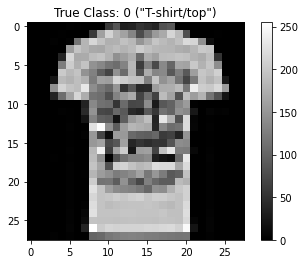

In [9]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

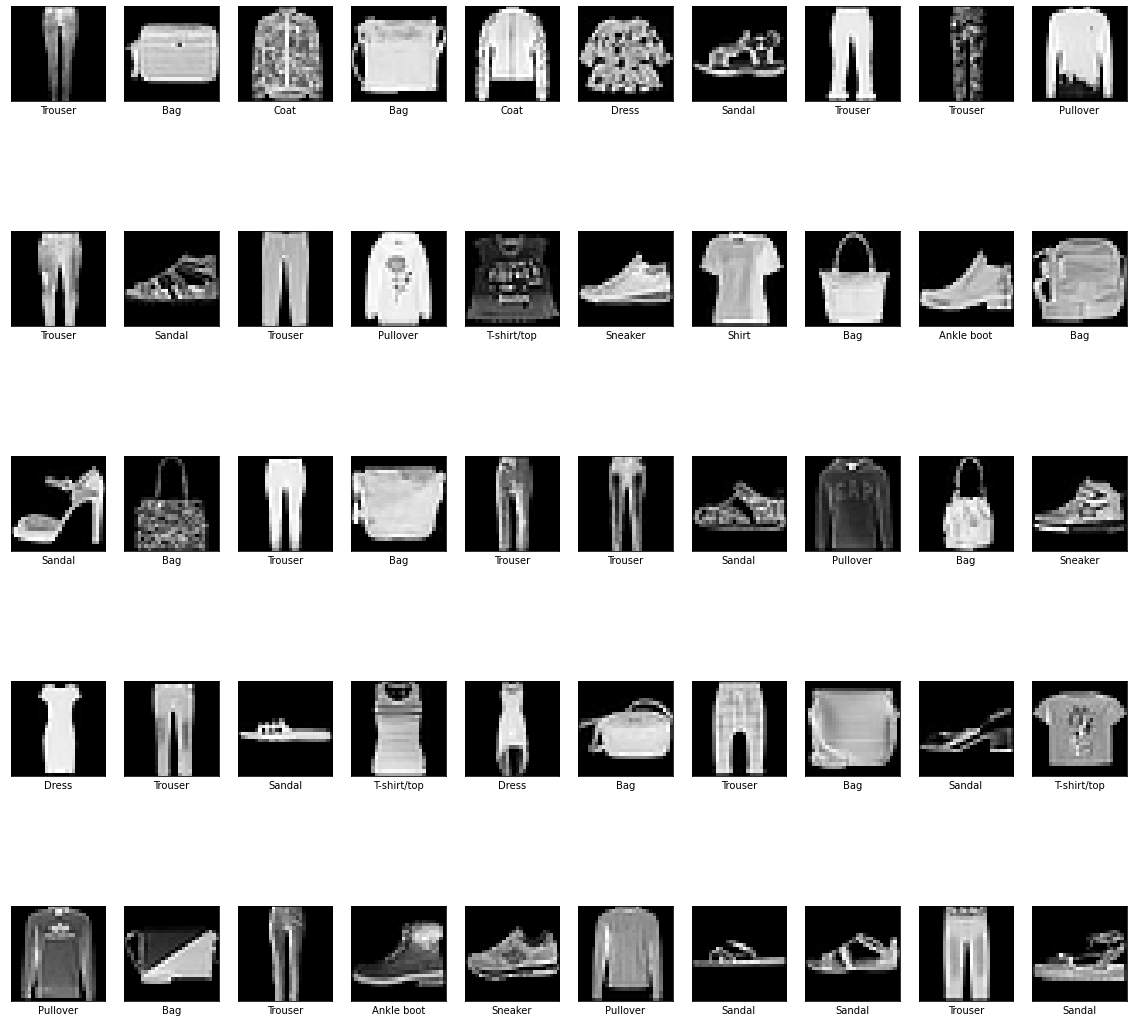

In [10]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

${\textbf{Preporocessing}}$

In [11]:
# Flatten
# Convert the 28x28 image into a flat vector of 28x28 = 784 values
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [12]:
# Normalize
train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255.
test_images_model = test_images_flatten/255.

In [13]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

In [14]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 
model= Sequential()
model.add(Dense(256,activation="sigmoid",input_dim =784))
model.add(Dropout(0.3))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(10,activation='sigmoid'))

model.summary()

# End Code

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 [==============================] - 3s 4ms/step - loss: 0.7543 - accuracy: 0.7450 - val_loss: 0.4936 - val_accuracy: 0.8218
Epoch 2/40
391/391 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.8291 - val_loss: 0.4541 - val_accuracy: 0.8269
Epoch 3/40
391/391 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8464 - val_loss: 0.3994 - val_accuracy: 0.8539
Epoch 4/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8566 - val_loss: 0.3897 - val_accuracy: 0.8563
Epoch 5/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3788 - accuracy: 0.8622 - val_loss: 0.3688 - val_accuracy: 0.8663
Epoch 6/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8688 - val_loss: 0.3587 - val_accuracy: 0.8676
Epoch 7/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8721 - val_loss: 0.3659 - val_accuracy: 0.8686
Epoch 

In [16]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.8914999961853027


In [17]:
test_logits = model.predict(test_images_flatten)

313/313 [==============================] - 0s 932us/step


In [18]:
test_logits

array([[1.3448118e-04, 5.2167361e-06, 1.2553440e-04, ..., 5.2291059e-01,
        6.0554601e-05, 9.9971265e-01],
       [2.0400516e-03, 5.0427808e-08, 9.8945588e-01, ..., 2.5100174e-08,
        5.7579773e-06, 2.7593874e-08],
       [3.2365363e-04, 9.9976391e-01, 1.9599682e-04, ..., 1.5689855e-04,
        7.8188550e-06, 4.9298469e-06],
       ...,
       [2.6243720e-02, 8.6976443e-10, 2.8525558e-03, ..., 5.6991765e-05,
        9.9858522e-01, 1.7374273e-07],
       [1.5444301e-04, 9.9985075e-01, 1.4615146e-04, ..., 4.0456838e-05,
        4.0876371e-06, 6.6314001e-06],
       [5.7291500e-06, 8.4461146e-07, 2.8492768e-05, ..., 9.5189765e-02,
        1.5611194e-01, 1.4575329e-03]], dtype=float32)

In [19]:
test_predictions = np.argmax(test_logits, axis=1)

In [20]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

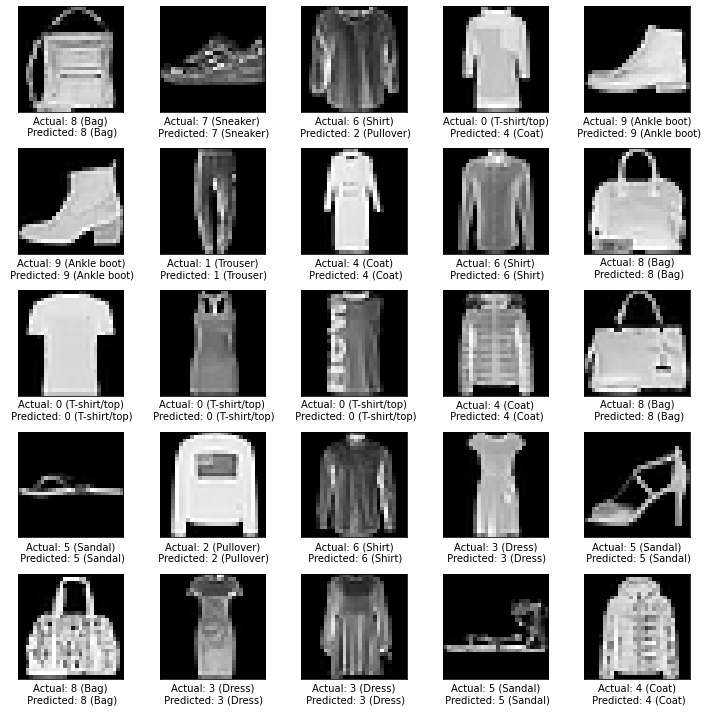

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()

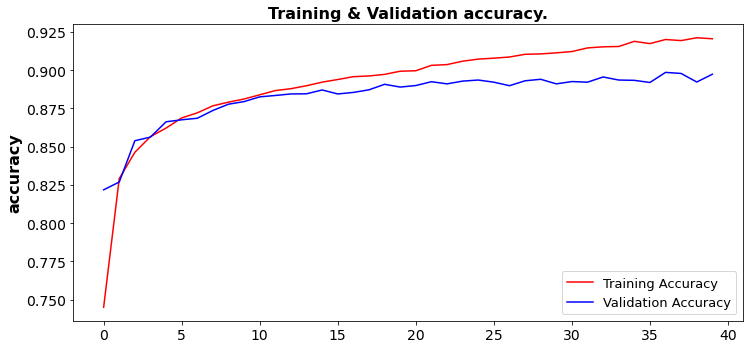

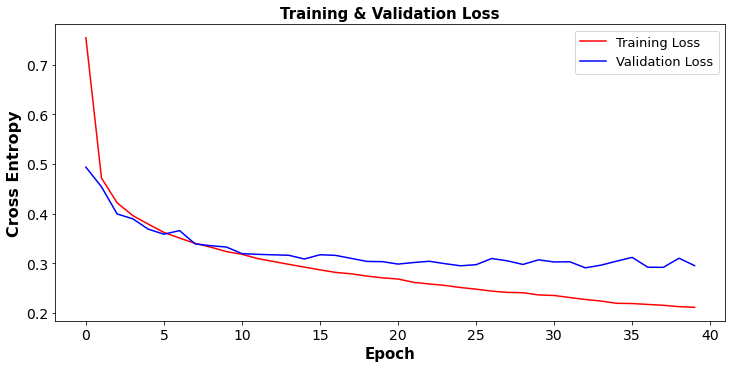

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation accuracy.', fontsize=16, weight='bold')

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
# plt.yscale('log')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()